# Decision trees: classification and regression 

Import of libraries 

In [1]:
from __future__ import division, print_function
# turn off warnings of Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

Plot to compare different classification parameters (Shenon entropy, Gini impurity index, Misclassification score)

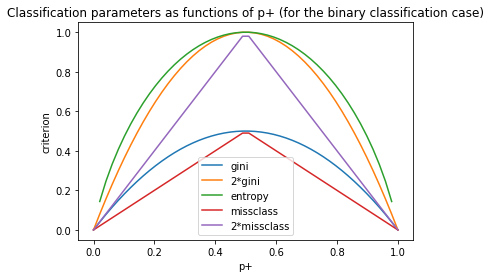

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Classification parameters as functions of p+ (for the binary classification case)')
plt.legend();

Random generation of two different types of data

In [3]:
# class one
# np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# class two
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Visualisation of these two classes

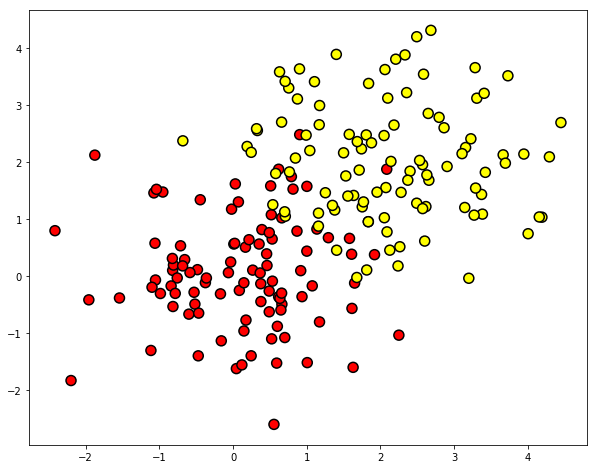

In [4]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

Decision tree training code

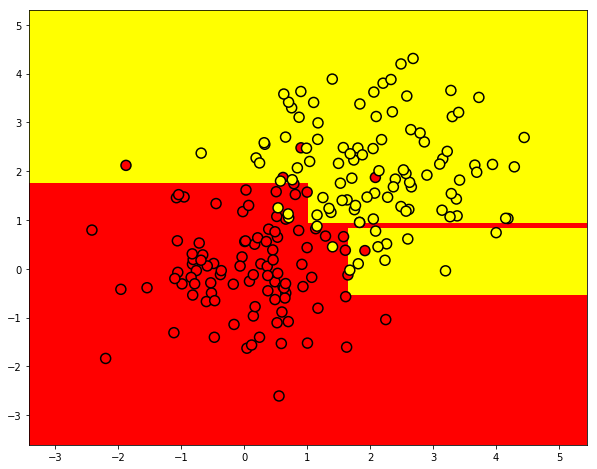

In [5]:
from sklearn.tree import DecisionTreeClassifier

# function for the grid to use for the decision tree results visualization
def get_grid(data):
 x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
 y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
 return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# parameter min_samples_leaf is the minimal number of the elements
# for the node splitting
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# tree training 
clf_tree.fit(train_data, train_labels)

# code to show the data splitting 
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

Code to plot the tree using png file (you can just open png file itself for a better quality) 

In [6]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file="small_tree.dot", rounded = True, filled=True)

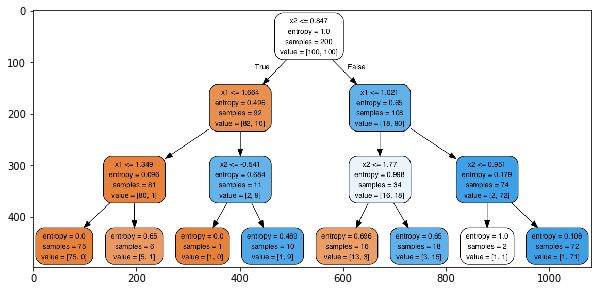

In [7]:
import matplotlib.image as mp
import matplotlib.pyplot as plt


! dot -Tpng "small_tree.dot" -o "small_tree.png"

img = mp.imread("small_tree.png")
plt.imshow(img)
plt.show()

Generate data about the function $f(x) = e^{-x^2} + 1.5 e^{-(x-2)^2}$ to train a decison tree for regression 

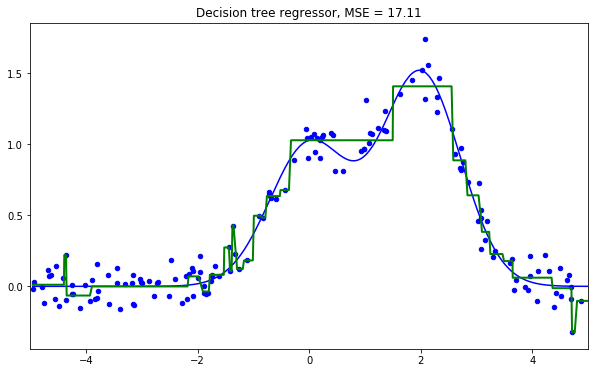

In [179]:
n_train = 150        
n_test = 1000       
noise = 0.1
np.random.seed(42)
def f(x):
 x = x.ravel()
 return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
 X = np.random.rand(n_samples) * 10 - 5
 X = np.sort(X).ravel()
 y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0.0, noise, n_samples)
 X = X.reshape((n_samples, 1))
 return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

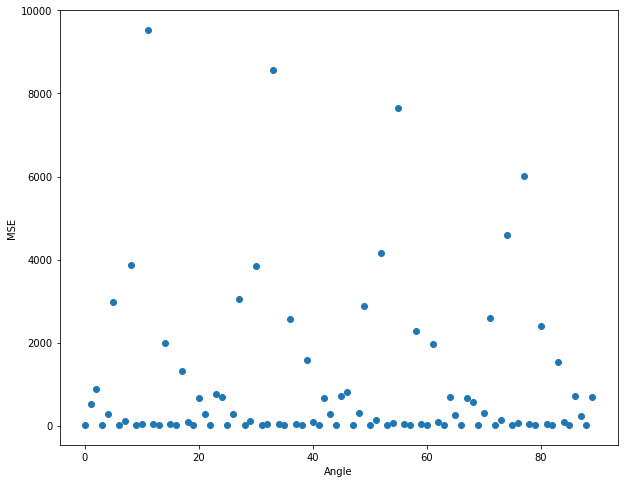

In [333]:
results=[]
for theta in range(90):
    mat=np.dot(np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]),[X_train.flatten(),y_train])
    mat1=np.dot(np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]),[X_test.flatten(),y_test])
    reg_tree.fit(np.transpose(mat[0]), np.transpose(mat[1]))
    reg_tree_pred = reg_tree.predict(np.transpose(mat1[0]))
    results.append(np.sum((np.array(mat1[1]).flatten() - reg_tree_pred) ** 2))
angle=np.arange(90)
plt.scatter(angle,results)
plt.xlabel("Angle")
plt.ylabel("MSE")
plt.show()

In [364]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train.reshape(-1,1))

In [368]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train.flatten())
lin_reg.intercept_, lin_reg.coef_

(0.75376699430644356, array([ 0.05801345, -0.04032895]))

In [374]:
s=0
r=np.array(X_test).flatten()
for n in range(np.size(r)):
    s=s+(y_test[n]-(lin_reg.intercept_+lin_reg.coef_[0]*r[n]+lin_reg.coef_[1]*r[n]**2))**2
    
print("MSE=", s/np.size(r)*100)

MSE= 13.0239767195


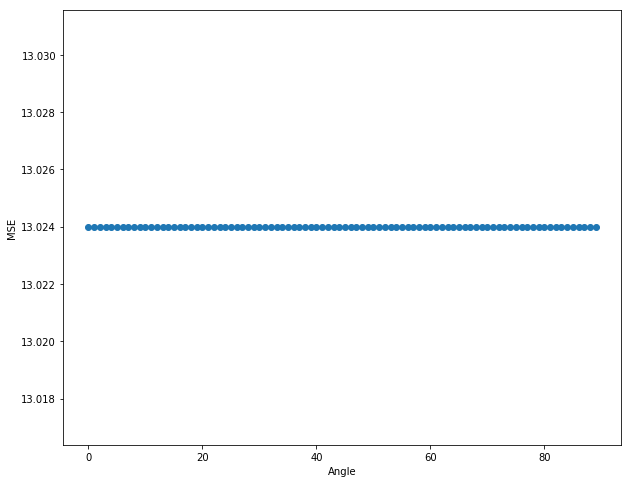

In [375]:
results=[]
for theta in range(90):
    mat=np.dot(np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]),[X_train.flatten(),y_train])
    mat1=np.dot(np.matrix([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]),[X_test.flatten(),y_test])
    X_poly = poly_features.fit_transform(X_train.reshape(-1,1))
    lin_reg.fit(X_poly, y_train.flatten())
    lin_reg.intercept_, lin_reg.coef_
    s=0
    r=np.array(X_test).flatten()
    for n in range(np.size(r)):
        s=s+(y_test[n]-(lin_reg.intercept_+lin_reg.coef_[0]*r[n]+lin_reg.coef_[1]*r[n]**2))**2
    results.append(s/np.size(r)*100)
angle=np.arange(90)
plt.scatter(angle,results)
plt.xlabel("Angle")
plt.ylabel("MSE")
plt.show()

# Summary:
Polynomial regression gives me a lower MSE and it is invariant to tilting the data in contrast to the decison tree.